# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/Users/jwhoj/Desktop/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\jwhoj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


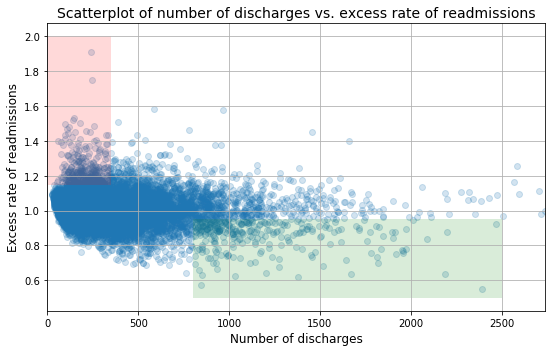

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Initial observations based on the plot above

    Overall, rate of readmissions is trending down with increasing number of discharges
    With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
    With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)


The scatter plot above shows "Scatterplot of number of discharges vs. excess rate of readmissions". 
It is useful to use a scatterplot to convey the relationship between two variables. However you 
need to know how to use them and interpret them properly. A disadvantage of using a scatter plot 
is it can make it hard to see data or trends clearly. 

In [5]:
# Linear regression on the hospital admission data
a, b = np.polyfit(x, y, 1)
print(a, b)

-2.8565052943822905e-05 1.0179475579544215


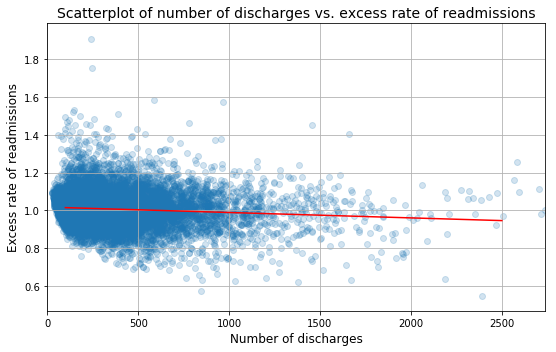

In [6]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([100, 2500])
y_theor = a * x_theor + b

# Plot the above data and a theoretical line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.plot(x_theor, y_theor, 'r')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# Show the plot
plt.show()

From our linear regression, our value of 'a' which is the slope -2.8565052943822905e-05. 
We can see the trend line is ever so slightly trending downwards. However, the slope 
is so close to zero it is not convincing enough to say the data is decreasing. 

# B. Statistics

    In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
    In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [18]:
# In hospitals/facilities with number of discharges < 100, mean excess readmission rate 
np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'])

1.0226183501683506

In [16]:
small_hospital_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & 
                                           (clean_hospital_read_df['Number of Discharges'] > 0) ]

In [10]:
# In hospitals/facilities with number of discharges < 100, the portion that has excess readmission rate greater than 1
len(small_hospital_df[small_hospital_df['Excess Readmission Ratio'] > 1])/len(small_hospital_df)

0.6321548821548821

In [12]:
# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate
np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >1000]['Excess Readmission Ratio'])

0.9783354211663071

In [19]:
large_hospital_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

In [20]:
# In hospitals/facilities with number of discharges > 1000, the portion that has excess readmission rate greater than 1
len(large_hospital_df[large_hospital_df['Excess Readmission Ratio'] > 1])/len(large_hospital_df)

0.4449244060475162

As we can see from our analysis of the mean excess readmission rate, 
we do indeed see that the B. Statistics observation is correct. 
In smaller hospitals/facilities where number of discharges are < 100, 
the mean excess readmission rate is 1.0226183501683506 and the 
portion that have excess readmission rate greater than 1 is 0.6321548821548821.

In large hospitals/facilities where the number of discharges are > 1000, 
the mean excess readmission rate is 0.9783354211663071 and the 
portion that have excess readmission rate greater than 1 is 0.4449244060475162.

# C. Conclusions

    There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
    Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


In [21]:
# Compute the pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [22]:
# Compute observed correlation: r_obs
n_discharges = np.array(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]['Number of Discharges'])
readmission = np.array(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]['Excess Readmission Ratio'])
r_obs = pearson_r(readmission, n_discharges)
print('The observed correlation is', r_obs)

The observed correlation is -0.09739794351079353


In [23]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute readmission rate: readmission_permuted
    readmission_permuted = np.random.permutation(readmission)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(readmission_permuted, n_discharges)

# Compute p-value: p
p = np.sum(perm_replicates < r_obs) / len(perm_replicates)
print('p-val =', '%.2f' %p)



p-val = 0.00


In [25]:
# For significance level α  = 0.01
from scipy import stats
mean_correlation = np.mean(perm_replicates)
std_correlation = np.std(perm_replicates)
interval = stats.norm.interval(0.99, loc=mean_correlation, scale=std_correlation)
print('For significance level α  = 0.01, the 99% confidence interval of the correlation efficient is', interval)

For significance level α  = 0.01, the 99% confidence interval of the correlation efficient is (-0.02420367659324598, 0.024065473997208466)


The null hypothesis for observation C is that there is no significant correlation between hospital capacity
(number of discharges) and readmission rates. This correlation may just be due to chance and is completely independent. 
This is the null hypothesis we explored above. By using the permutation test, we are simulating the hypothesis that 
they are independent of each other. For each permutation, we will calculate the Pearson correlation coefficient to see 
how many permutation replicates have a Pearson correlation coefficient > than the observed value. 

As the testing above shows, the observed correlation is -0.09739794351079353 which is lower than the p-value of 0.00 
This means that we reject the null hypothesis and that there is statistical significance between readmission rates 
and hospital capacity. This coincides with the possibility that smaller hospitals/facilities are lacking quality 
equipment and care to prevent readmissions. 

# D. Regulatory policy recommendations

    Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
    Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


In [26]:
# Compare ratios between small and large hospitals/facilities 
small = np.array(small_hospital_df['Excess Readmission Ratio'])
large = np.array(big_hospital_df['Excess Readmission Ratio'])

In [29]:
# Compute difference of mean Excess Readmission Ratio from data: empirical_diff_means
empirical_diff_means = np.mean(small) - np.mean(large)
print('Difference of mean excess readmission ratio is', empirical_diff_means)

Difference of mean excess readmission ratio is 0.04428292900204345


In [31]:
# Generate a permutation sample from two data sets
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [32]:
# Generate permutation replicates
def draw_perm_reps(data_1, data_2, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

    return perm_replicates

In [34]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(small, large, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', '%.8f' %p)

p-value = 0.00000000


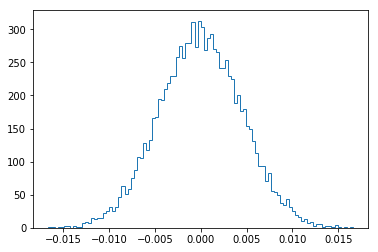

In [35]:
plt.hist(perm_replicates, bins=100, histtype='step')
plt.show()

For a significance level of 99.9%, the null hypothesis is false. 
There is a statistical difference between excess readmission ratio of large and small hospital/facilities. 

As we have computed, smaller hospitals/facilities have a mean excess readmission rate of 1.023. 
While larger hospitals/facilities have a mean excess readmission rate of 0.978. Though there is 
a statistical significance between the two readmission rates, it is almost negligible. 

For practical significance, I would recommend hospitals and facilities to focus on other variables that may contribute 
to the quality of care for patients to influence the readmission rate. For example, making sure patients being discharged
understand fully and thoroughly after care instructions for their well-being at home. This will potentially help 
lessen the readmission rate if patients are educated about their care. 